In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib as plt

In [5]:
mnist = tf.keras.datasets.mnist
mnist = mnist.load_data()

## Get sample sizes

In [7]:
# help(mnist)
# Length of tuple
len(mnist)

2

In [96]:
# Get length of each tuple
len(mnist[0]), len(mnist[1])

(2, 2)

In [97]:
# Get length of each of those tuples
len(mnist[0][0]), len(mnist[0][1]), len(mnist[1][0]), len(mnist[1][1])

(60000, 60000, 10000, 10000)

In [106]:
# Actually gets level 2 lengths (but level 1 needs to be same length for this to work)
for i, j in mnist:
    print(len(i), len(j))

60000 60000
10000 10000


In [154]:
# Can see the "shape" attribute
mnist[0][0].shape

(60000, 28, 28)

## Turn into training set and dataset

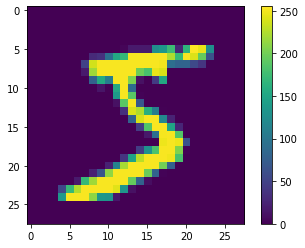

In [29]:
# See the original - the scale of pixels is from 0 to 255:
plt.pyplot.figure()
plt.pyplot.imshow(mnist[0][0][0])
plt.pyplot.colorbar()
plt.pyplot.grid(False)
plt.pyplot.show()

In [6]:
# Divide into training sets
(train_data, train_label), (test_data, test_label) = mnist
# Then rescale and convert to floating point numbers
train_data, test_data = train_data / 255.0, test_data / 255.0

In [15]:
# Again, can see the shape attribute
print(train_data.shape,
      len(train_label),
      test_data.shape,
      len(test_label))

(60000, 28, 28) 60000 (10000, 28, 28) 10000


## View an image from the dataset

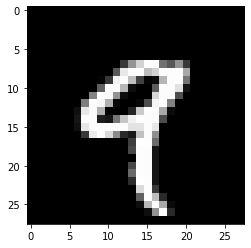

In [48]:
image = train_data[4]
image = np.array(image, dtype='float')
pixels = image.reshape((28, 28)) # reshape is from np
plt.pyplot.imshow(pixels, cmap='gray')

In [49]:
train_label[4]

9

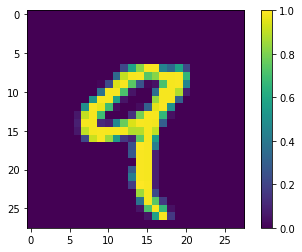

In [23]:
# Alternative code from https://www.tensorflow.org/tutorials/keras/classification
# My values ahve already been scaled from 0 to 1
plt.pyplot.figure()
plt.pyplot.imshow(train_data[4])
plt.pyplot.colorbar()
plt.pyplot.grid(False)
plt.pyplot.show()

#### Display first 25 images from training set - thanks https://www.tensorflow.org/tutorials/keras/classification

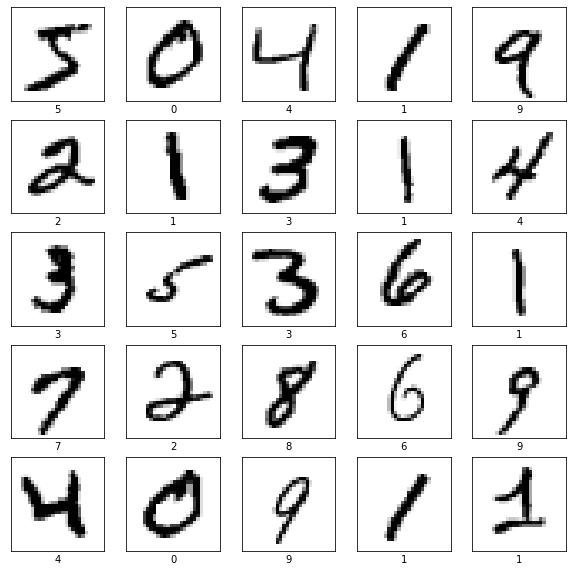

In [40]:
plt.pyplot.figure(figsize=(10, 10))

for i in range(25):
    plt.pyplot.subplot(5, 5, i+1)
    plt.pyplot.xticks([]) # Remove x-axis ticks
    plt.pyplot.yticks([]) # Remove y-axis ticks
    plt.pyplot.grid(False)
    plt.pyplot.imshow(train_data[i], cmap=plt.cm.binary)
    plt.pyplot.xlabel(train_label[i]) # If wanted to map to diff names, see the tutorial
    
plt.pyplot.show()

## Build the model

In [11]:
# 3 layers. 2 learning layers
# Set up the parameters
model_foo = keras.Sequential([
    # Turns 2D to 1D - lining up the pixels, no learning
    keras.layers.Flatten(input_shape=(28, 28)),
    # 128 nodes.
    keras.layers.Dense(128, activation='relu'),
    # 10 notes, returns a logits array with length 10
    keras.layers.Dense(10)
])

In [76]:
help('tensorflow.keras.Sequential.compile')
#help('tensorflow.keras.optimizers')
#help('tensorflow.keras.Sequential.evaluate')

Help on function compile in tensorflow.keras.Sequential:

tensorflow.keras.Sequential.compile = compile(self, optimizer='rmsprop', loss=None, metrics=None, loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None, distribute=None, **kwargs)
    Configures the model for training.
    
    Arguments:
        optimizer: String (name of optimizer) or optimizer instance.
            See `tf.keras.optimizers`.
        loss: String (name of objective function), objective function or
            `tf.keras.losses.Loss` instance. See `tf.keras.losses`. An objective
            function is any callable with the signature
            `scalar_loss = fn(y_true, y_pred)`. If the model has multiple
            outputs, you can use a different loss on each output by passing a
            dictionary or a list of losses. The loss value that will be
            minimized by the model will then be the sum of all individual
            losses.
        metrics: List of metrics t

In [12]:
# Compile the model - after setting up the parameters
model_foo.compile(
    # This is how the model is updated based on the data it sees and its loss func
    optimizer='adam',
    # Want to minimise loss
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    # The fraction of images correctly classified
    metrics=['accuracy'])

In [13]:
# TRAINING TIME
model_foo.fit(train_data, train_label, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2700 - accuracy: 0.9240
Epoch 2/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1194 - accuracy: 0.9650
Epoch 3/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0803 - accuracy: 0.9759
Epoch 4/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0604 - accuracy: 0.9811
Epoch 5/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0460 - accuracy: 0.9859
Epoch 6/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0358 - accuracy: 0.9892
Epoch 7/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0285 - accuracy: 0.9915
Epoch 8/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0244 - accuracy: 0.9926
Epoch 9/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0198 - accuracy: 0.9937
Epoch 10/10
60

In [68]:
# Evaluating accuracy
test_loss, test_acc = model_foo.evaluate(test_data, test_label, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.0969 - accuracy: 0.9752

Test accuracy: 0.9752


#### Testing variables and compilation

In [94]:
## Testing something
m_test = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

m_test.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

# See object
print('\n', m_test, '\n') # Still sequential

# So running evaluate before fitting/training the model
m_loss, m_acc = m_test.evaluate(test_data, test_label, verbose=2)
print('\nTest accuracy:', m_acc, '\n')

## Then try run the model
m_new = m_test.fit(train_data, train_label, epochs=3) # If I assign to variable..
print('\n', m_test)
print('\n', m_new.history, '\n') # Then can use to show loss and accuracy

## Then run the evaluate agin
m_loss, m_acc = m_test.evaluate(test_data, test_label, verbose=2)
print('\nTest accuracy:', m_acc)



10000/10000 - 0s - loss: 2.3483 - accuracy: 0.1024

Test accuracy: 0.1024 

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2608 - accuracy: 0.9247
Epoch 2/3
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1173 - accuracy: 0.9656
Epoch 3/3
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0814 - accuracy: 0.9749


 {'loss': [0.26075240675310296, 0.11731347733388345, 0.0813978069367508], 'accuracy': [0.92466664, 0.96555, 0.97491664]} 

10000/10000 - 0s - loss: 0.0822 - accuracy: 0.9751

Test accuracy: 0.9751


So the after setting parameters and compiling the model - but before training - if I run it on the test data, it works, but the accuracy is shoddy.

After I train the model, and run it on the test data, then the results are much better.

I don't need to assign the model to a variable when I train it. But if I do, then I can use the history to show loss and accuracy for each epoch.

Since the .fit function returns a history object, it's actually modifying the original model. So if I run the .evaluate, I do it on the original model, not on the new history object.

### Making predictions

In [14]:
# Create is probability model
# The model has linear output - logits.
probability_model = keras.Sequential([
    model_foo,
    # Add softmax layer to convert logits to probabilities
    keras.layers.Softmax()
])

print(probability_model)

In [24]:
predictions = probability_model.predict(test_data)

print(predictions[0])
# Get index of max
print(np.argmax(predictions[0]))
print(test_label[0])

[6.6206646e-10 1.0235692e-11 6.4882306e-07 5.3433757e-03 6.7827151e-13
 1.3386972e-09 1.0619602e-16 9.9465585e-01 3.6969052e-08 1.3168736e-07]
7
7


In [18]:
# Graph this - making the functions
# For each image
def plot_image(i, predictions_array, true_label, img):
    #predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    predictions_array = predictions_array
    true_label = true_label[i]
    img = img[i]
    
    plt.pyplot.grid(False)
    plt.pyplot.xticks([])
    plt.pyplot.yticks([])
    
    plt.pyplot.imshow(img, cmap=plt.pyplot.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    # Add pic caption
    plt.pyplot.xlabel("{} {:2.0f}% (True: {})".format(predicted_label,
                                                     100*np.max(predictions_array),
                                                     true_label),
                      color = color)

# Plot value array - the graph
def plot_value_array(i, predictions_array, true_label):
    predictions_array = predictions_array
    true_label = true_label[i]
    predicted_label = np.argmax(predictions_array)
    
    plt.pyplot.grid(False)
    plt.pyplot.xticks(range(10))
    plt.pyplot.yticks([])
    thisplot = plt.pyplot.bar(range(10), predictions_array, color = "#777777")
    plt.pyplot.ylim([0, 1])
    
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

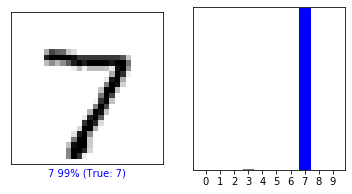

In [25]:
i = 0
plt.pyplot.figure(figsize=(6, 3)) # Otherwise the two plots are unequally sized
# First pic
plt.pyplot.subplot(1, 2, 1)
plot_image(i, predictions[i], test_label, test_data)

# Graph
plt.pyplot.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_label)
plt.pyplot.show()

In [115]:
predictions[0], test_label[0]

(array([1.0643873e-18, 1.2411586e-15, 4.3256810e-14, 1.2366892e-09,
        1.6662598e-16, 1.5782226e-14, 8.4818426e-23, 1.0000000e+00,
        1.9930333e-14, 3.4869829e-11], dtype=float32),
 7)

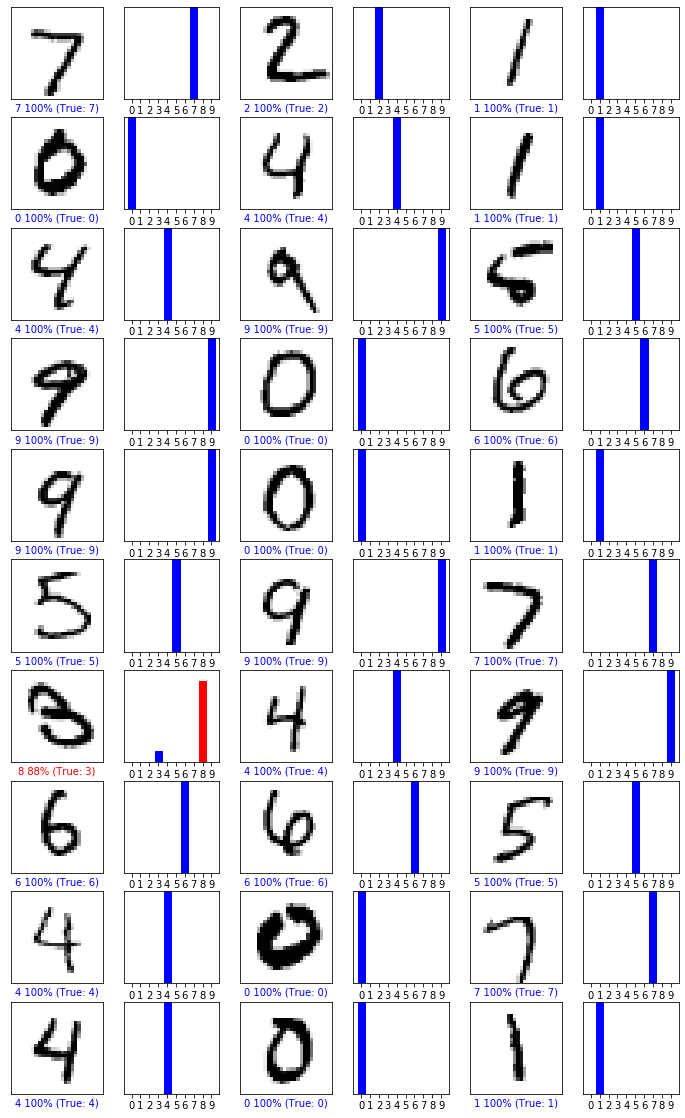

In [130]:
# Plot the first X test images, their predicted labels, and the true labels
# Blue = correct prediction
# Red = incorrect prediction
plot_rows = 10
plot_cols = 3
num_images = plot_rows*plot_cols

plt.pyplot.figure(figsize=(2*2*plot_cols, 2*plot_rows))

for i in range(num_images):
    plt.pyplot.subplot(plot_rows, 2*plot_cols, 2*i+1)
    plot_image(i, predictions[i], test_label, test_data)
    plt.pyplot.subplot(plot_rows, 2*plot_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_label)
    
#plt.pyplot.tight_layout()


## Applying prediction to one unit

In [9]:
# Grabbing an image from test dataset
single_n = test_data[3]

print(single_n.shape)

# Adding it to a batch (or else tf.keras doesn't like it)
single_n = (np.expand_dims(single_n, 0))

print(single_n.shape)

(28, 28)
(1, 28, 28)


In [16]:
# Predict correct label for the image
predictions_single = probability_model.predict(single_n)

print(predictions_single)

[[9.9960691e-01 1.6820492e-09 3.3145343e-04 9.4857687e-06 2.5054511e-10
  5.2366953e-08 1.2729309e-06 6.4864244e-06 1.6839833e-07 4.4221026e-05]]


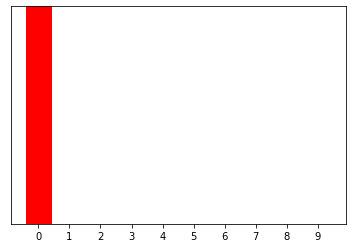

In [29]:
# Plot this
plot_value_array(1, predictions_single[0], test_label)

In [32]:
# Grab the preditions for the single batch
np.argmax(predictions_single[0])

0

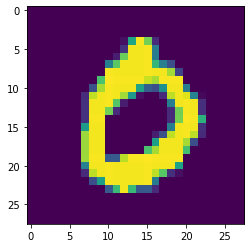

In [38]:
# Can double check the image to be sure
plt.pyplot.imshow(single_n[0])

In [126]:
#help("tensorflow.Variable")
#help('numpy.reshape')
help('matplotlib.pyplot.subplot')
#help('numpy.argmax')

Help on function subplot in matplotlib.pyplot:

matplotlib.pyplot.subplot = subplot(*args, **kwargs)
    Add a subplot to the current figure.
    
    Wrapper of `.Figure.add_subplot` with a difference in behavior
    explained in the notes section.
    
    Call signatures::
    
       subplot(nrows, ncols, index, **kwargs)
       subplot(pos, **kwargs)
       subplot(ax)
    
    Parameters
    ----------
    *args
        Either a 3-digit integer or three separate integers
        describing the position of the subplot. If the three
        integers are *nrows*, *ncols*, and *index* in order, the
        subplot will take the *index* position on a grid with *nrows*
        rows and *ncols* columns. *index* starts at 1 in the upper left
        corner and increases to the right.
    
        *pos* is a three digit integer, where the first digit is the
        number of rows, the second the number of columns, and the third
        the index of the subplot. i.e. fig.add_subplot(235) i